In [112]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.figure as figure

In [113]:
df = pd.read_csv('NASDAQ.csv')

In [114]:
df.head()

,Date,LABEL,Open,High,Low,Close,Volume,InterestRate,ExchangeRate,VIX,Gold,Oil,TEDSpread,EFFR
0,2008/4/1,0,2306.510010,2362.750000,2305.399902,2362.750000,2.160120e+09,1.77,1.5615,22.68,897.00,100.92,1.30,2.38
1,2008/4/2,1,2363.419922,2381.209961,2347.780029,2361.399902,1.996680e+09,1.72,1.5618,23.43,893.50,104.83,1.31,2.18
2,2008/4/3,1,2347.909912,2373.989990,2339.379883,2363.300049,1.993480e+09,1.70,1.5667,23.21,898.25,103.92,1.35,2.19
3,2008/4/4,0,2366.909912,2391.929932,2351.760010,2370.979980,1.977560e+09,1.67,1.5735,22.45,905.25,106.09,1.40,2.26
4,2008/4/7,0,2386.620117,2390.040039,2359.540039,2364.830078,1.730020e+09,1.62,1.5713,22.42,914.70,108.91,1.28,2.24


In [115]:
data_df = df.drop(['Date', 'LABEL'], axis=1)

In [116]:
data_df.head()

,Open,High,Low,Close,Volume,InterestRate,ExchangeRate,VIX,Gold,Oil,TEDSpread,EFFR
0,2306.510010,2362.750000,2305.399902,2362.750000,2.160120e+09,1.77,1.5615,22.68,897.00,100.92,1.30,2.38
1,2363.419922,2381.209961,2347.780029,2361.399902,1.996680e+09,1.72,1.5618,23.43,893.50,104.83,1.31,2.18
2,2347.909912,2373.989990,2339.379883,2363.300049,1.993480e+09,1.70,1.5667,23.21,898.25,103.92,1.35,2.19
3,2366.909912,2391.929932,2351.760010,2370.979980,1.977560e+09,1.67,1.5735,22.45,905.25,106.09,1.40,2.26
4,2386.620117,2390.040039,2359.540039,2364.830078,1.730020e+09,1.62,1.5713,22.42,914.70,108.91,1.28,2.24


In [117]:
data_df_X = data_df.drop(['Close'], axis=1)[:-1]
data_df_y = data_df['Close']
data_df_y = data_df_y.shift(-1, axis=0)[:-1]
X = data_df_X.values
y = data_df_y.values

In [118]:
corr_df = pd.concat([data_df_X, data_df_y], axis=1)
corr_df.head()

,Open,High,Low,Volume,InterestRate,ExchangeRate,VIX,Gold,Oil,TEDSpread,EFFR,Close
0,2306.510010,2362.750000,2305.399902,2.160120e+09,1.77,1.5615,22.68,897.00,100.92,1.30,2.38,2361.399902
1,2363.419922,2381.209961,2347.780029,1.996680e+09,1.72,1.5618,23.43,893.50,104.83,1.31,2.18,2363.300049
2,2347.909912,2373.989990,2339.379883,1.993480e+09,1.70,1.5667,23.21,898.25,103.92,1.35,2.19,2370.979980
3,2366.909912,2391.929932,2351.760010,1.977560e+09,1.67,1.5735,22.45,905.25,106.09,1.40,2.26,2364.830078
4,2386.620117,2390.040039,2359.540039,1.730020e+09,1.62,1.5713,22.42,914.70,108.91,1.28,2.24,2348.760010


In [119]:
corr = corr_df.corr()

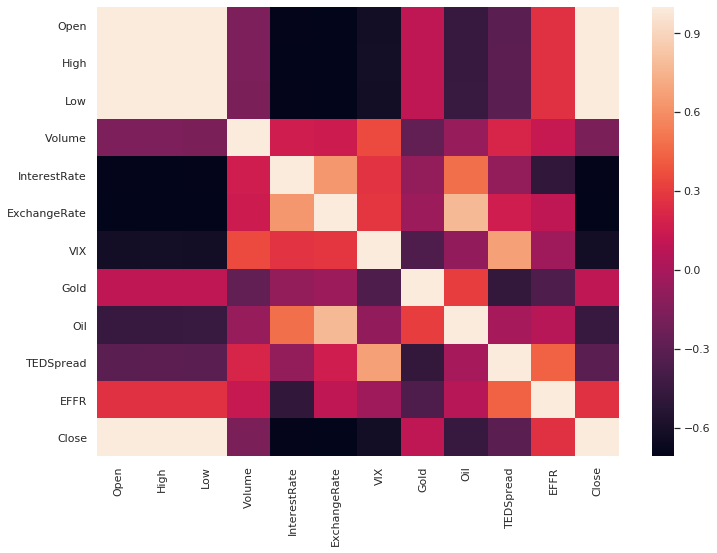

In [120]:
sb.set(rc={'figure.figsize':(11.7,8.27)})
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [122]:
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)
y_train_norm = scaler.fit_transform(y_train)
y_test_norm = scaler.fit_transform(y_test)

In [123]:
n_input = 11
n_l1 = 12
n_l2 = 14
n_l3 = 14
n_l4 = 14
n_l5 = 14
n_out = 1

In [124]:
X = tf.placeholder(dtype=tf.float32, shape=[None, n_input])
Y = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [125]:
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [126]:
w1 = tf.Variable(weight_initializer([n_input, n_l1]))
b1 = tf.Variable(bias_initializer([n_l1]))
w2 = tf.Variable(weight_initializer([n_l1, n_l2]))
b2 = tf.Variable(bias_initializer([n_l2]))
w3 = tf.Variable(weight_initializer([n_l2, n_l3]))
b3 = tf.Variable(bias_initializer([n_l3]))
w4 = tf.Variable(weight_initializer([n_l3, n_l4]))
b4 = tf.Variable(bias_initializer([n_l4]))
w5 = tf.Variable(weight_initializer([n_l4, n_l5]))
b5 = tf.Variable(bias_initializer([n_l5]))
w_out = tf.Variable(weight_initializer([n_l5, n_out]))
b_out = tf.Variable(bias_initializer([n_out]))

In [127]:
l1 = tf.nn.relu(tf.add(tf.matmul(X, w1), b1))
l2 = tf.nn.relu(tf.add(tf.matmul(l1, w2), b2))
l3 = tf.nn.relu(tf.add(tf.matmul(l2, w3), b3))
l4 = tf.nn.relu(tf.add(tf.matmul(l3, w4), b4))
l5 = tf.nn.relu(tf.add(tf.matmul(l4, w5), b5))
out = tf.transpose(tf.add(tf.matmul(l5, w_out), b_out))

In [128]:
mse = tf.reduce_mean(tf.squared_difference(out, Y))
opt = tf.train.AdamOptimizer().minimize(mse)

In [129]:
test_session = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [130]:
test_session.run(tf.global_variables_initializer())

In [131]:
batch_size = 5
for e in range(50):
    for i in range(len(y_train)):
        start = i * batch_size
        batch_X = X_train_norm[start : start + batch_size]
        batch_y = y_train_norm[start : start + batch_size]
        test_session.run(opt, feed_dict={X: batch_X, Y: batch_y})

In [132]:
test_session.run(mse, feed_dict={X: X_test_norm, Y: y_test_norm})

0.1320751

In [133]:
predictions = test_session.run(out, feed_dict={X: X_test_norm})

In [134]:
predictions_denorm = scaler.inverse_transform(predictions)

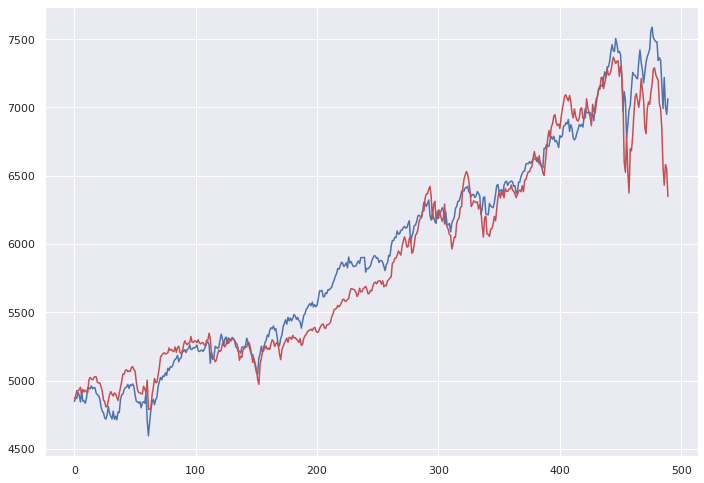

In [135]:
plt.plot(range(len(y_test)), y_test, color='b')
plt.plot(range(len(y_test)), predictions_denorm.flatten(), color='r')
plt.show()

In [140]:
X_train.shape

(1957, 11)